# Loading Data

## Load Data from a external source

We do not load local files, because loading local files with colab is very different from loading with a local **Jupyter** installation.

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/unibas-franckborel/course_jupyter/master/examples/ex1.csv'
c = pd.read_csv(url)
c



,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## Automatically add column names

In [0]:
import pandas as pd

url2 = 'https://raw.githubusercontent.com/unibas-franckborel/course_jupyter/master/examples/ex2.csv'
d = pd.read_csv(url2)
d

e = pd.read_csv(url2, names= ['a', 'b','c', 'd', 'message'])
e

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


## Exercise 1
Load and print out the sample data set "iris" from following address:
'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'


# Introduction to pandas

- pandas is a Python package
- data analysis
- data manipulation

## Well suited for

- **Tabular data** with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered **time series** data
- arbitrary **matrix** data
-  **observational / statistical data sets**. The data actually need not be labeled at all to be placed into a pandas data structure

## Does well...
- easy handling of missing data
- Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
- Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
- Intuitive merging and joining data sets
- Flexible reshaping and pivoting of data sets
- Hierarchical labeling of axes (possible to have multiple labels per tick)
- Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

## Data Structures
1. Series: 1D labeled homogeneously-typed array
2. **DataFrame:** General 2D labeled, size-mutable tabular structure with ponentially hereogeneously-typed column


 <img src="https://www.tutorialspoint.com/python_pandas/images/structure_table.jpg" alt="DataFrame"> 

### DataFrame

General 2D labeled, size-mutable tabular structure with ponentially hereogeneously-typed column


    pandas.DataFrame( data, index, columns, dtype, copy)
    
 DataFrame can be created using various inputs like

    Lists
    dict
    Series
    Numpy ndarrays
    another DataFrame



In [0]:
import pandas as pd

# create using single list of lists
data = [1,2,3,4,5]
df = pd.DataFrame(data)
df

,0
0,1
1,2
2,3
3,4
4,5


In [0]:
import pandas as pd

data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
df

,Name,Age
0,Alex,10.0
1,Bob,12.0
2,Clarke,13.0


## Create a simple sample

In [0]:
import pandas as pd

dates = pd.date_range('20180101', periods = 6)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [0]:
import pandas as pd

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2018-01-01,-0.392543,1.260988,0.137946,-0.388689
2018-01-02,-0.029823,0.782247,0.245696,-0.310713
2018-01-03,-0.353743,0.176755,0.852827,0.657446
2018-01-04,0.696841,-0.687491,0.402485,0.614573
2018-01-05,1.625343,0.400999,-0.105278,-0.603198
2018-01-06,1.101396,-0.062322,-1.715410,1.351166


## Viewing Data

In [0]:
df.head()

,A,B,C,D
2018-01-01,-0.092046,0.078620,-0.345134,-1.770895
2018-01-02,-0.916852,-0.163671,-0.325574,-0.126821
2018-01-03,2.722927,0.038398,1.420088,-0.826912
2018-01-04,-0.267781,0.446486,0.770548,2.278112
2018-01-05,-0.838507,0.502648,-0.529309,-1.465270


In [0]:
df.tail(3)

,A,B,C,D
2018-01-04,-0.267781,0.446486,0.770548,2.278112
2018-01-05,-0.838507,0.502648,-0.529309,-1.465270
2018-01-06,-0.976956,-1.699686,0.486287,1.191130


In [0]:
df.index

In [0]:
df.describe()

### Getting and Selection

In [0]:
df['A']

2018-01-01   -0.092046
2018-01-02   -0.916852
2018-01-03    2.722927
2018-01-04   -0.267781
2018-01-05   -0.838507
2018-01-06   -0.976956
Freq: D, Name: A, dtype: float64

In [0]:
df[0:3] # selecting via [], which slices the rows

In [0]:
df['20180102':'20180104']

In [0]:
df.loc[:, ['A', 'B']] # Selecting on a multi-axis by label:

,A,B
2018-01-01,-0.092046,0.078620
2018-01-02,-0.916852,-0.163671
2018-01-03,2.722927,0.038398
2018-01-04,-0.267781,0.446486
2018-01-05,-0.838507,0.502648
2018-01-06,-0.976956,-1.699686


In [0]:
df.loc['20180102', ['A', 'B']] # Reduction in the dimensions of the returned object

A   -0.029823
B    0.782247
Name: 2018-01-02 00:00:00, dtype: float64

In [0]:
df.loc[df['A'] > 1] # Get all data, where A is greater than 1

,A,B,C,D
2018-01-05,1.625343,0.400999,-0.105278,-0.603198
2018-01-06,1.101396,-0.062322,-1.715410,1.351166


## Excercise 2
Load the "iris" sample dataset and select the columns **sepal_length** and **species**!

## Excercise 3

From the result above select now the first 5 rows!

## Excercise 4
From the iris sample data select all setosa species!

In [0]:
df.loc[df['species'] == 'setosa']

50

##  Combining and transforming


    pandas.merge
    pandas.concat
    combine_first

### Combining and Merging Datasets

In [0]:
import pandas as pd

df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})
df1
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [0]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [0]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [0]:
import pandas as pd

df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1
df2
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [0]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [0]:
import pandas as pd

left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [0]:
pd.merge(left, right, on='key1')
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


## Excercise 5

**Inner join** from the real data set "an italian journey" the tables 

1. sources.csv ('https://raw.githubusercontent.com/unibas-franckborel/course_jupyter/master/real_datasets/sample_1/sources.csv') and 

2. quotes.csv ('https://raw.githubusercontent.com/unibas-franckborel/course_jupyter/master/real_datasets/sample_1/quotes.csv'.).

Use as merging key **source_id**

## Transforming Data

### Removing Duplicates

In [0]:
import pandas as pd

data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [0]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [0]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [0]:
data['v1'] = range(7)
data


,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [0]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


##  Excercise 6

Remove the duplicates from the sample data set flights_with_dublicates:

 'https://raw.githubusercontent.com/unibas-franckborel/course_jupyter/master/examples/flights_with_dublicates.csv'

## Transforming Data Using a Function or Mapping

### Replacing Values

In [0]:
import pandas as pd

data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [0]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [0]:
data.replace([-999, -1000], np.nan)

In [0]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## Excercise 7
Replace Roman numbers with Arabic numbers in the data sample https://raw.githubusercontent.com/unibas-franckborel/course_jupyter/master/examples/anscombe.csv.

##  Matplotlib

Matplotlib is the most common charting package.

Line Plots

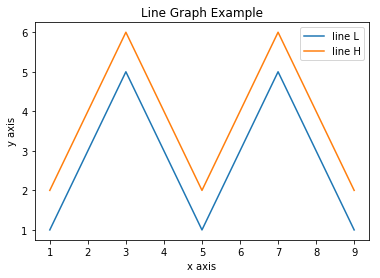

In [0]:
import matplotlib.pyplot as plt

x  = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y1 = [1, 3, 5, 3, 1, 3, 5, 3, 1]
y2 = [2, 4, 6, 4, 2, 4, 6, 4, 2]
plt.plot(x, y1, label="line L")
plt.plot(x, y2, label="line H")
plt.plot()

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

## Bar Plots

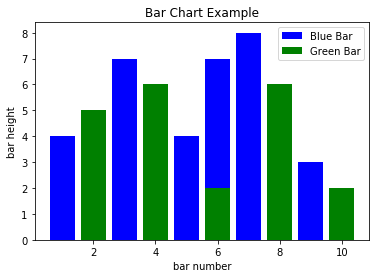

In [0]:
import matplotlib.pyplot as plt

# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = [1, 3, 4, 5, 6, 7, 9]
y1 = [4, 7, 2, 4, 7, 8, 3]

x2 = [2, 4, 6, 8, 10]
y2 = [5, 6, 2, 6, 2]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.bar(x2, y2, label="Green Bar", color='g')
plt.plot()

plt.xlabel("bar number")
plt.ylabel("bar height")
plt.title("Bar Chart Example")
plt.legend()
plt.show()

## Histograms

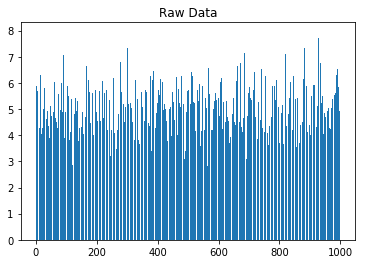

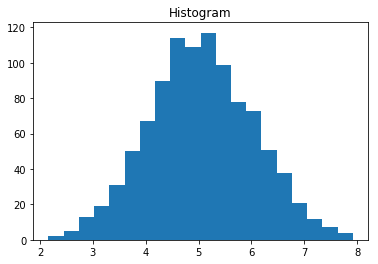

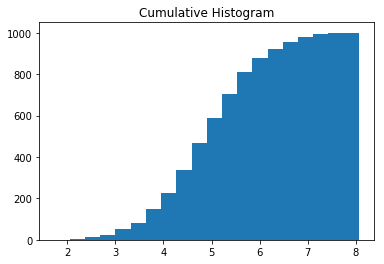

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Use numpy to generate a bunch of random data in a bell curve around 5.
# numpy.random.randn returns a sample from the standard normal distribution.
# Returns a ndarray or float
y = 5 + np.random.randn(1000) 

# x axis
x = [x for x in range(len(n))]

plt.bar(x, y)
plt.title("Raw Data")
plt.show()

plt.hist(y, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

You can plot data directly from your DataFrame using the plot() method:

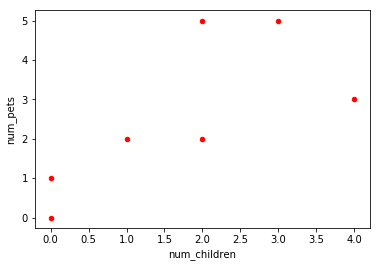

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()


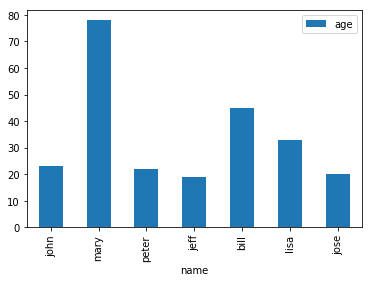

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df.plot(kind='bar',x='name',y='age')


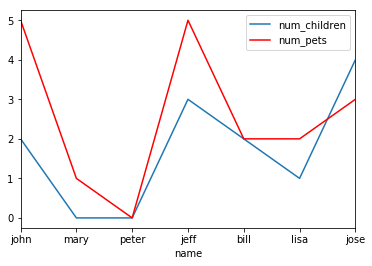

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children', ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()


## Excercise 8

Create a bar graph with the dataset measurement_of_particle_size (https://raw.githubusercontent.com/unibas-franckborel/course_jupyter/master/examples/measurement_of_particle_size.csv). Use
- the column **Altitude** as x Axis and 
- the column **Particle size** as the y axis. 